# Linear Regression

## Introduction


In this lecture, we will look at:

- What (linear) regression is;

- What other types of regression there are;

- How to carry out a regression analysis in Python. 

We have already learnt about how two variables can be related through correlation:



- Two variables move together: both increase and decrease together;


- or one increases while the other decreases. 

In regression analysis, we will learn how **groups of variables** can be correlated to a single **target**, or outcome, variable, and how these relationships can be used *to **predict** the future or new values of that outcome*.


We call the variables that are correlated with the outcome **independent**, or X variables, and the outcome variable the **dependent**, or Y variable. 

Regression analysis is one of the most common techniques used to make predictions. 

Depending on the question we would like to answer, and the format of the outcome variable, regression analysis can be used to both make **value predictions (what will my income be next year?)** and **classifications (based on the qualities of a song, will I like it or not?)**. 

For value predictions, we would use a **linear (or non-linear) regression model**, whereas for a classification problem we would use a **logistic regression algorithm**. 

**Important:** To keep things easy, we will not be concerned here with testing and training -- our only goal will be to learn how to fit the data and build a model.

## Simple Linear Regression (Univariate)


A univariate analysis, or simple linear regression, is carried out when only one X (independent) variable is used to predict the outcome variable. 

In the case of linear univariate analysis, we can model this relationship using a straight line. The mathematical formula is:

$$Y = \beta_{0} + \beta_{1} X,$$


where:

*   X - Independent variable;
*   Y - Dependent variable;
*   $\beta_{1}$ - the quantity of change (positive or negative). If we increase X by one unit, Y will increase by $\beta_{1}$ units. Also called the ‘slope’; 
*   $\beta_{0}$ - intercept (or constant). This is the value at which the regression line crosses the y axis. 



To put it in more concrete terms:

*   X = Age of the Child;
*   Y = Height of the Child;
*   $\beta_{1}$ - the quantity of change (positive or negative) = 9.5 cm;
*   $\beta_{0}$ - intercept (or constant) = 10 cm. 


### Example 1: Python Implementation of Univariate Linear Regression


Let us look at an example. 


Here we will use data from a Fitbit, a personal health monitor. This dataset includes information on an individual’s activity levels (steps, calories, heart rate), exercise, sleep, as well as assorted community and personal profile information added by the user. 

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/Fitbit2.csv')
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


Let us now consider two highly correlated columns.

In [3]:
data[["NumberOfAwakings", "MinutesOfBeingAwake"]].corr()

,NumberOfAwakings,MinutesOfBeingAwake
NumberOfAwakings,1.000000,0.951817
MinutesOfBeingAwake,0.951817,1.000000


We can create a Seaborn regplot. In this plot, Seaborn will visually create a regression model for us. 

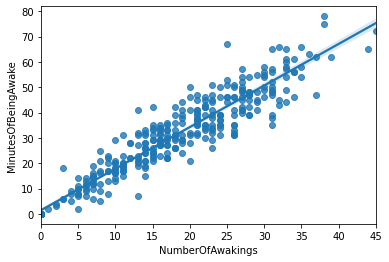

In [5]:
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data);

We observe that as the number of awakenings increases, so does the number of minutes of being awake. 

This makes sense, given that if you wake up more times in the night, you will also likely be awake for more minutes (even if you wake up for a short time).

Now that we've plotted it, let us get the actual parameters of this model.

Recall that we want to predict the MinutesofBeingAwake using the NumberOfAwakeings. 

We have the following:

*   X = "NumberOfAwakings";
*   Y = "MinutesOfBeingAwake";
*   $\beta_{1}$ - ?;
*   $\beta_{0}$ - ?.

Or, stated differently:

$$\text{MinutesofBeingAwake} = \beta_{0} + \beta_{1} \text{NumberOfAwakenings}.$$


The following Python code example shows you how to calculate the intercept and slope:

In [6]:
from scipy import stats

In [7]:
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [9]:
print('The slope is, b1: ' + str(slope))
print('The intercept is, b0: ' + str(intercept))

The slope is, b1: 1.6405141436199793
The intercept is, b0: 1.4381033523783202


We now know all the terms in our forumla. Our model would be:

$$\text{MinutesofBeingAwake} = 1.44 + 1.64 \text{NumberOfAwakeings}.$$


Even though we can compute the slope and the intercept directly, it may not be clear by now *how* the regression model is chosen. 

We will look at this in the next section. 

## Fitting 

It is nice to see that we can generate a regression model and plot, but *how* does the regression algorithm determine which line fits the data best.  

In machine learning, there are many fitting procedures. The most well-known is called **ordinary least squares (OLS).**

OLS is nothing more than a procedure that helps us determine which line fits the data best. 

In the case of OLS, this is the line that produces the lowest number (has the lowest squared value). This number is often called the **summed squared error (SSE).**

Let us have a look at a visualisation of the method we will use to fit our data: https://seeing-theory.brown.edu/regression-analysis/index.html#section1

Let us now implement this using the statsmodels library. 

In [3]:
import statsmodels.api as sm

We can now build the model. 

In [8]:
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']

Note that we use the OLS method to indicate that we want to fit a linear regression model using the OLS. 

In [9]:
X = sm.add_constant(X) # add intercept 
model = sm.OLS(Y,X) 

In [10]:
X

,const,NumberOfAwakings
0,1.0,23
1,1.0,21
2,1.0,25
3,1.0,21
4,1.0,44
...,...,...
362,1.0,18
363,1.0,8
364,1.0,15
365,1.0,22


Now that we have our object, we can call the fit method to actually carry out the regression procedure.

In [14]:
results = model.fit()

This will give us a results object. 

In [15]:
results

In order to actually get an output, we need to call the predict method. 

Note that we input the X values here ('NumberOfAwakings') to predict the Y values ('MinutesOfBeingAwake'). 

In [20]:
predictions = results.predict(X)
predictions

0      39.169929
1      35.888900
2      42.450957
3      35.888900
4      73.620726
         ...    
362    30.967358
363    14.562217
364    26.045816
365    37.529415
366    52.294042
Length: 367, dtype: float64

Let us put the predicted values and compare them to the actual values. 

In [2]:
compare = pd.DataFrame({'Actual':Y, 'predicted':predictions})
compare.head(10)

<IPython.core.display.Javascript object>

NameError: name 'Y' is not defined

Let us now make a prediction for a value that *does not* occur in the data set.

In [21]:
data['NumberOfAwakings'].sort_values(ascending=True).unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 44, 45])

It seems that the value 70 for numbers of being awake does not occur. 

We can now make a prediction as follows:

In [26]:
results.predict([0,70])  # add constant 

array([114.83599005])

According to our model, if there are 70 awakenings, a person is awake for 114 minutes. 

### Manually Computing the SSE

In [ ]:
np.sum([Y[i] - (slope + predictions[i]) for i in range(len(Y))])**2

## Evaluation of the Model

Let us now get a summary. In particular, we're interested in the R-squared (or $R^{2}$) score. 

In [27]:
from sklearn.metrics import r2_score
print('The r-squared score of our model is:', r2_score(Y, predictions))

The r-squared score of our model is: 0.9059552749155962


**Important**: We will discuss the $R^{2}$ performance measure in more detail in a later lecture. 

For now, it is important that a score of 1 is essentially perfect and a score of 0 is the worst possible score.

To illustrate this visually, below are two plots. The plot on the left shows a regression model (blue line) that has an $R^{2}$ of 0.38 and the one on the right has an $R^{2}$ of 0.87. 

![alt text](https://blog.minitab.com/hubfs/Imported_Blog_Media/fittedxobserved.gif)


Source: https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

The R2 score, therefore, tells us how well the regression line explains the variability in the data. 

In other words, if there is a lot of variability and therefore more dispersion of the data points (left plot), it is harder to predict other values than in a case where the data points neatly fall on a straight line (right plot).

### Example 2: Housing Prices

Let's see if there are variables with which we may be able to predict the housing price.

In [28]:
import numpy as np

In [29]:
housing = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/housing_prices.csv')
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [30]:
housing.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

It seems that 'GrLivArea' has a strong correlation with HousePrice. Let take 'GrLivArea' as our X variable.

In [31]:
housing['GrLivArea'].head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

Let us plot this relationship.

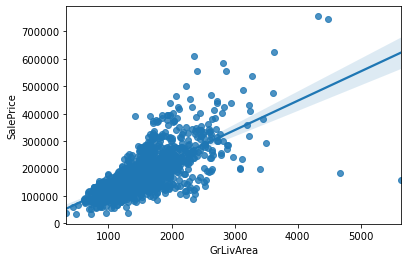

In [33]:
sns.regplot(x='GrLivArea', y='SalePrice', data=housing);

Now it's time to do it ourselves (i.e. not rely solely on Seaborn).

In [35]:
X = housing['GrLivArea']
Y = housing['SalePrice']

X = sm.add_constant(X) # add intercept 
model = sm.OLS(Y,X)

Time to fit!

In [36]:
results = model.fit()

Now we want to predict.

In [37]:
predictions = results.predict(X)

Lastly, let us compare the values and obtain the $R^{2}$.

In [38]:
pd.DataFrame({'Actual':Y, 'predicted':predictions})

,Actual,predicted
0,208500,201761.939688
1,181500,153767.538871
2,223500,209903.846969
3,140000,202511.852201
4,250000,254041.554863
...,...,...
1455,175000,195012.727073
1456,210000,240650.259993
1457,266500,269254.065837
1458,142125,134055.552822


In [39]:
from sklearn.metrics import r2_score

In [40]:
print('The r-squared score of our model is:', r2_score(Y, predictions))

The r-squared score of our model is: 0.5021486502718042


Here we observe that the $R^{2}$ is much lower than in our previous example with the Fitbit data.

How could this be the case?

Recall that in our previous example, we had a much better fit (less variation). This explains the difference between these two values. 

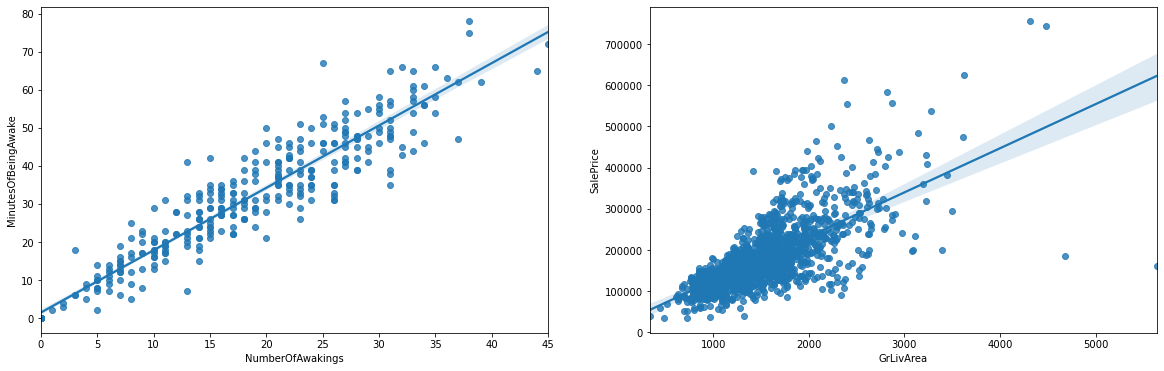

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(20,6))
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data, ax=axes[0])
sns.regplot(x='GrLivArea', y='SalePrice', data=housing, ax=axes[1])

plt.show() 

## Other Types of Regression

### Linear vs. Non-Linear Regression

The word 'linear' in 'linear regression' denotes the fact that we are dealing with a straight line (or plane, when considering multiple dimensions).

It is, however, also possible to do a non-linear regression.

Visually, the difference between the two would be as follows:



![alt text](https://sixsigmastudyguide.com/wp-content/uploads/2019/11/non0.jpg)



For example, if we want to build a non-linear relationship for which the relationship is quadratic, the non-linear model would take the following form:



$$Y = \beta_{0} + \beta_{1} X^{2}$$

**Important:** Any type of regression that is not a linear regression, is simply called a non-linear regression analysis. 

### Univariate vs. Multivariate Regressions

In some cases, there is only one predictor variable, which makes the relation a simple **(univariate) linear regression.** 

This is essentially what we've looked at during this lecture up until now. 

In other cases, there are more than one predictor variables which is called **multivariate linear regression.**

In such a regression, $Y$ is still the same, but we have added additional $X$’s to our equation.


Our regression equation would then take the following form:

$$Y = \beta_{0} + \beta_{1} X_{1} + ... + \beta_{n} X_{n}.$$


Concretely this means that we simply add $n$ variable (i.e. data frame columns) to our regression model in order maybe improve the prediction. 


![alt text](https://miro.medium.com/max/1120/0*AqzOn7p--nveVULA.png)

Let us revisit the previous example with the housing prices data set. 

However, instead of using just one variable, let us now use several. 

In [42]:
housing.corr()['SalePrice'].sort_values(ascending=False).head(5)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [43]:
#X = housing[['GrLivArea',GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea']]
#X = housing[['GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea']]

X = housing[['GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea']]
Y = housing['SalePrice']

# Build
X = sm.add_constant(X) # add intercept 
model = sm.OLS(Y,X)
# Fit
results = model.fit()  ## -> SSE/OLS Procedure 
# Predict
predictions = results.predict(X)
# Summary
print('The r-squared score of our model is:', r2_score(Y, predictions))

The r-squared score of our model is: 0.7417730971016032


It seems that by using more variables, we were able to obtain a better model since the $R^{2}$ is higher. 

# Summary

In this lesson we learnt about:

- Linear Regression and how to implement a regression model;

- The difference between linear and non-linear regression models;

- The difference between univariate regression models and multivariate models; 

- How to implement multivariate models. 